<a href="https://colab.research.google.com/github/marcelolandivar/Python_Projects/blob/master/Dogs_and_cats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**NEURAL NETWORK FOR IMAGE CLASSIFICATION** 
**Binary Image Classification of Cats and Dogs using Tensorflow** \
###By: Marcelo Landivar
---

>**Email:** <MarceloLandivar24@gmail.com>
> **RESOURCES:**  TensorFlow


Open this notebook in Google Colaboratory:  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mSShvkXDCAthxf9k7CGajCJRWm7EG1Ei?usp=sharing)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import zipfile
path_to_zip = f'/content/drive/My Drive/Data Science/AI_Dataset/Dogs_and_Cats/cats_and_dogs_filtered.zip'

PATH = os.path.join(os.path.dirname(path_to_zip), 'images')

with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(PATH)

In [7]:


train_dir = os.path.join(PATH, 'cats_and_dogs_filtered/train')
validation_dir = os.path.join(PATH, 'cats_and_dogs_filtered/validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

##Get all the data for training and validation(understand the data and get the data)


In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

##Check your data is balanced before training your CNN

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
# Image Size
IMG_HEIGHT = 150
IMG_WIDTH = 150

batch_size=128

train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255)

## Prepare your data (Generate your data for training and validation)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory= train_dir, shuffle=True, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, 
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


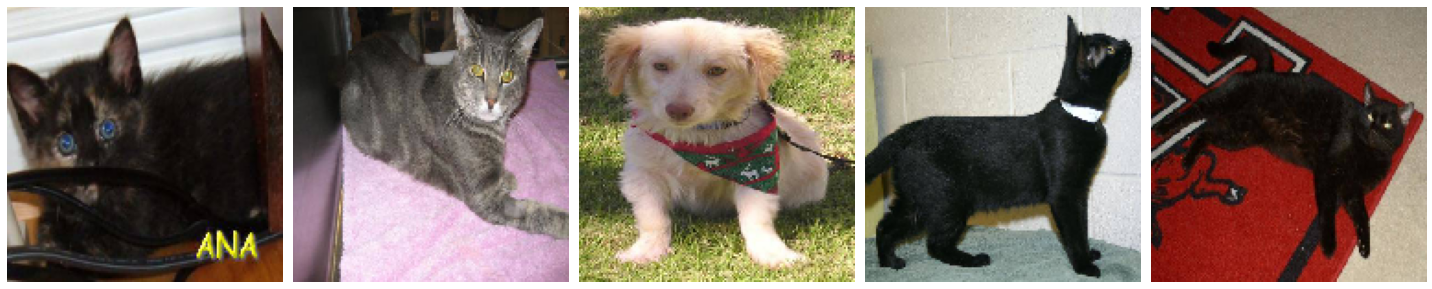

In [10]:
sample_training_images, _ = next(train_data_gen)

n_pics = 5
fig, axes = plt.subplots(1, n_pics, figsize=(20,20))
axes = axes.flatten()
for img, ax in zip(sample_training_images[:n_pics], axes):
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [14]:
epochs = 25
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/25
15/15 [==============================] - 52s 3s/step - loss: 0.7305 - accuracy: 0.4925 - val_loss: 0.6910 - val_accuracy: 0.5011
Epoch 2/25
15/15 [==============================] - 51s 3s/step - loss: 0.6896 - accuracy: 0.5390 - val_loss: 0.6799 - val_accuracy: 0.6741
Epoch 3/25
15/15 [==============================] - 51s 3s/step - loss: 0.6779 - accuracy: 0.5614 - val_loss: 0.6697 - val_accuracy: 0.5748
Epoch 4/25
15/15 [==============================] - 51s 3s/step - loss: 0.6461 - accuracy: 0.6234 - val_loss: 0.6249 - val_accuracy: 0.6473
Epoch 5/25
15/15 [==============================] - 51s 3s/step - loss: 0.6103 - accuracy: 0.6629 - val_loss: 0.6130 - val_accuracy: 0.6842
Epoch 6/25
15/15 [==============================] - 50s 3s/step - loss: 0.5791 - accuracy: 0.6976 - val_loss: 0.6031 - val_accuracy: 0.6897
Epoch 7/25
15/15 [==============================] - 54s 4s/step - loss: 0.5459 - accuracy: 0.7121 - val_loss: 0.5951 - val_accuracy: 0.7020
Epoch 8/25
15/15 [==

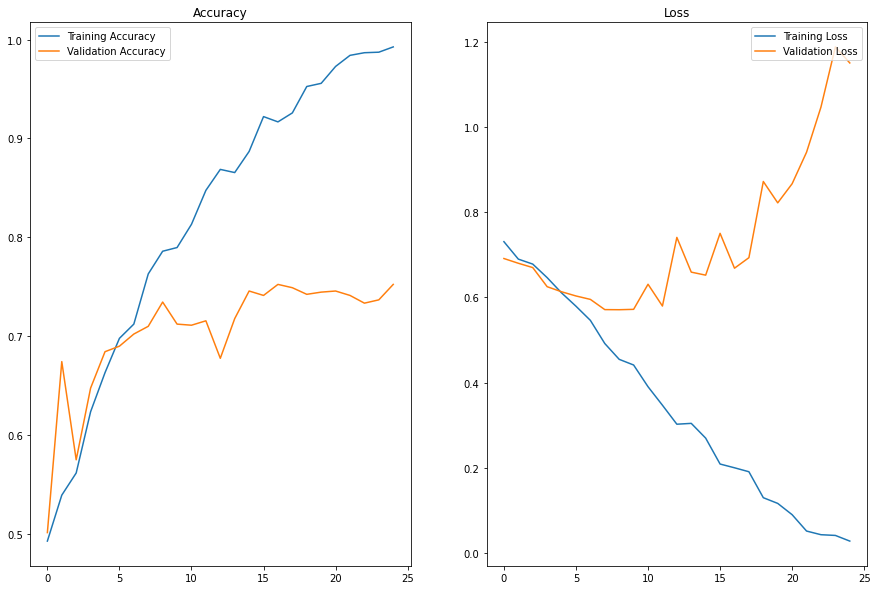

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()